In [1]:
# Importing Libraries


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import scipy


# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.layers import AveragePooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [1]:
# Displaying Images

picture_size = 48
folder_path = "D:/Amir/Classes/ML2/1_Emotion Recognition Project/Dataset/New_Dataset2/"


In [3]:
## Plot some images to check if it can read images

expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()


In [4]:
# Making Training and Validation Data

batch_size  = 128  

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 14976 images belonging to 7 classes.
Found 3687 images belonging to 7 classes.


In [5]:
# Model Building
# The code with my previous Hyper parametes that reached to: accuracy: 0.6713 - val_accuracy: 0.6004. lets make it better...

from keras.optimizers import Adam,SGD,RMSprop

no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size = (2,2)))
model.add(Dropout(0.15))

#2nd CNN layer
model.add(Conv2D(128,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size = (2,2)))
model.add(Dropout (0.15))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size = (2,2)))
model.add(Dropout (0.15))

#4th CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size = (2,2)))
model.add(Dropout (0.15))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.30))

# Fully connected 2nd layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.30))

# Fully connected 3rd layer
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.30))

model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 average_pooling2d (Average  (None, 24, 24, 64)        0         
 Pooling2D)                                                      
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [6]:
# Fitting the Model with Training and Validation Data 


from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [7]:
history = model.fit(train_set,
                    steps_per_epoch=train_set.n//train_set.batch_size,
                    epochs=epochs,
                    validation_data=test_set,
                    validation_steps=test_set.n//test_set.batch_size,
                    callbacks=callbacks_list)


Epoch 1/48
117/117 [==============================] - 390s 3s/step - loss: 1.9078 - accuracy: 0.3009 - val_loss: 1.7573 - val_accuracy: 0.3619 - lr: 1.0000e-04
Epoch 2/48
117/117 [==============================] - 244s 2s/step - loss: 1.7096 - accuracy: 0.3829 - val_loss: 1.6382 - val_accuracy: 0.4018 - lr: 1.0000e-04
Epoch 3/48
117/117 [==============================] - 209s 2s/step - loss: 1.5583 - accuracy: 0.4381 - val_loss: 1.5772 - val_accuracy: 0.4520 - lr: 1.0000e-04
Epoch 4/48
117/117 [==============================] - 253s 2s/step - loss: 1.4337 - accuracy: 0.4838 - val_loss: 1.7742 - val_accuracy: 0.4774 - lr: 1.0000e-04
Epoch 5/48
117/117 [==============================] - 254s 2s/step - loss: 1.3181 - accuracy: 0.5248 - val_loss: 1.2602 - val_accuracy: 0.5698 - lr: 1.0000e-04
Epoch 6/48
117/117 [==============================] - 211s 2s/step - loss: 1.2556 - accuracy: 0.5428 - val_loss: 1.3185 - val_accuracy: 0.5583 - lr: 1.0000e-04
Epoch 7/48
117/117 [====================

# Changes Applied from Model 2 to Model 3

## Batch Size:
- **Model 2**: Uses a batch size of 256.
- **Model 3**: Uses a batch size of 128.

## Pooling Layers:
- **Model 2**: Uses `MaxPooling2D` layers.
- **Model 3**: Uses `AveragePooling2D` layers.

## Dropout Layers:
- **Model 2**: Does not include Dropout layers.
- **Model 3**: Includes Dropout layers after convolutional and dense layers (0.15 for convolutional layers, 0.30 for dense layers).

## Fully Connected Layers:
- **Model 2**: Has three fully connected layers with 1024, 512, and 256 neurons respectively.
- **Model 3**: Has three fully connected layers with 512, 256, and 128 neurons respectively.

## Convolutional Layers:
- **Model 2**: Has five convolutional layers.
  - Layer 1: 64 filters, kernel size (3,3)
  - Layer 2: 128 filters, kernel size (3,3)
  - Layer 3: 256 filters, kernel size (3,3)
  - Layer 4: 512 filters, kernel size (3,3)
  - Layer 5: 512 filters, kernel size (3,3)
- **Model 3**: Has four convolutional layers.
  - Layer 1: 64 filters, kernel size (3,3)
  - Layer 2: 128 filters, kernel size (3,3)
  - Layer 3: 512 filters, kernel size (3,3)
  - Layer 4: 512 filters, kernel size (3,3)

## Optimizer Learning Rate:
- **Model 2**: Uses `Adam` optimizer with a learning rate of 0.001.
- **Model 3**: Uses `Adam` optimizer with a learning rate of 0.0001.

## Callbacks:
- **Model 2**: Uses `ReduceLROnPlateau` callback.
- **Model 3**: Uses `ReduceLROnPlateau`, `ModelCheckpoint`, and `EarlyStopping` callbacks.


# Plotting Accuracy & Loss

In [8]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [28]:
# Assuming 'folder_path' is the base directory for your datasets
dataset_path = folder_path  # Reuse the 'folder_path' variable from your existing code

# Correctly define expression categories based on your dataset structure
# Assuming expressions are the names of subdirectories within "Pre_train" and "Pre_validation"
expressions = os.listdir(os.path.join(dataset_path, "train"))

# Summarize dataset for both training and validation
print("Dataset Summary:")
for expression in expressions:
    train_images = os.listdir(os.path.join(dataset_path, "train", expression))
    val_images = os.listdir(os.path.join(dataset_path, "validation", expression))
    print(f"  {expression}: Training: {len(train_images)} images, Validation: {len(val_images)} images")

# Assuming you've trained your model and have the history object
final_train_accuracy = history.history['accuracy'][-1]  # Last epoch accuracy
final_train_loss = history.history['loss'][-1]  # Last epoch loss
final_val_accuracy = history.history['val_accuracy'][-1]  # Last epoch val_accuracy
final_val_loss = history.history['val_loss'][-1]  # Last epoch val_loss

# Display the final accuracy and loss in an organized way
print("\nModel Performance:")
print(f"  Final Training Accuracy: {final_train_accuracy*100:.2f}%")
print(f"  Final Training Loss: {final_train_loss:.4f}")
print(f"  Final Validation Accuracy: {final_val_accuracy*100:.2f}%")
print(f"  Final Validation Loss: {final_val_loss:.4f}")

# Assuming you want a classification report, which requires true labels and predictions
# Note: Generating a classification report requires sklearn.metrics.classification_report
# and predictions from your model. This section is placeholder since generating predictions
# and true labels was not part of the provided code and would depend on your specific setup.
# print("\nClassification Report:")
# from sklearn.metrics import classification_report
# true_labels = [...]  # You need to define this based on your dataset
# predictions = [...]  # You need to obtain model predictions
# report = classification_report(true_labels, predictions, target_names=expressions)
# print(report)


Dataset Summary:
  angry: Training: 2466 images, Validation: 585 images
  disgust: Training: 306 images, Validation: 79 images
  fear: Training: 2805 images, Validation: 687 images
  happy: Training: 6329 images, Validation: 1604 images
  neutral: Training: 3615 images, Validation: 894 images
  sad: Training: 3046 images, Validation: 714 images
  surprise: Training: 2589 images, Validation: 653 images

Model Performance:
  Final Training Accuracy: 72.82%
  Final Training Loss: 0.7481
  Final Validation Accuracy: 69.82%
  Final Validation Loss: 0.8792


29/29 [==============================] - 10s 345ms/step


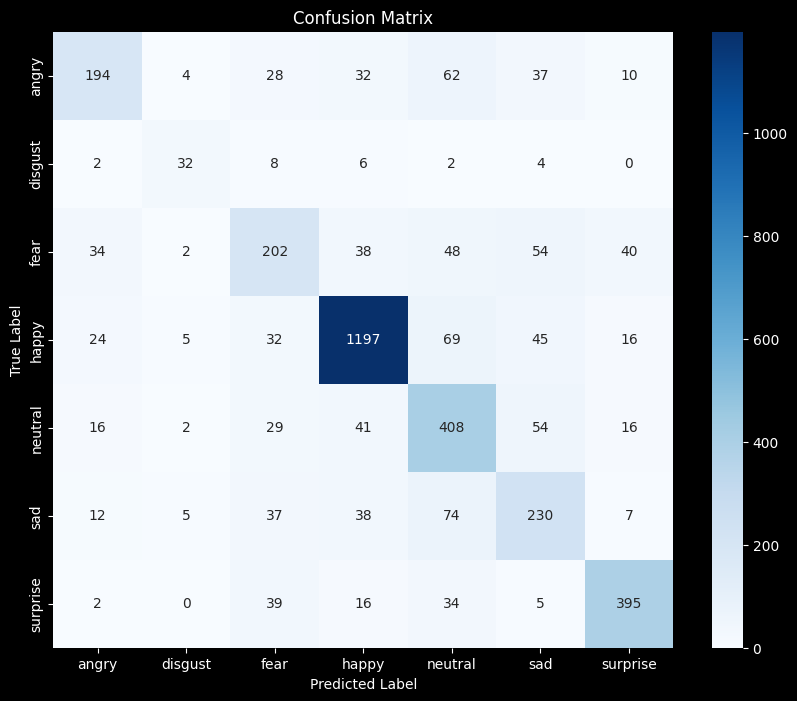

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming model and test_set are already defined and ready to use

# Reset the test_set generator to ensure the ordering is correct
test_set.reset()

# Predict on the entire test set, make sure to adjust steps to cover all samples
predictions = model.predict(test_set, steps=np.ceil(test_set.n/test_set.batch_size))

# Convert predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = test_set.classes

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Get class labels from the test set
class_labels = list(test_set.class_indices.keys())

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


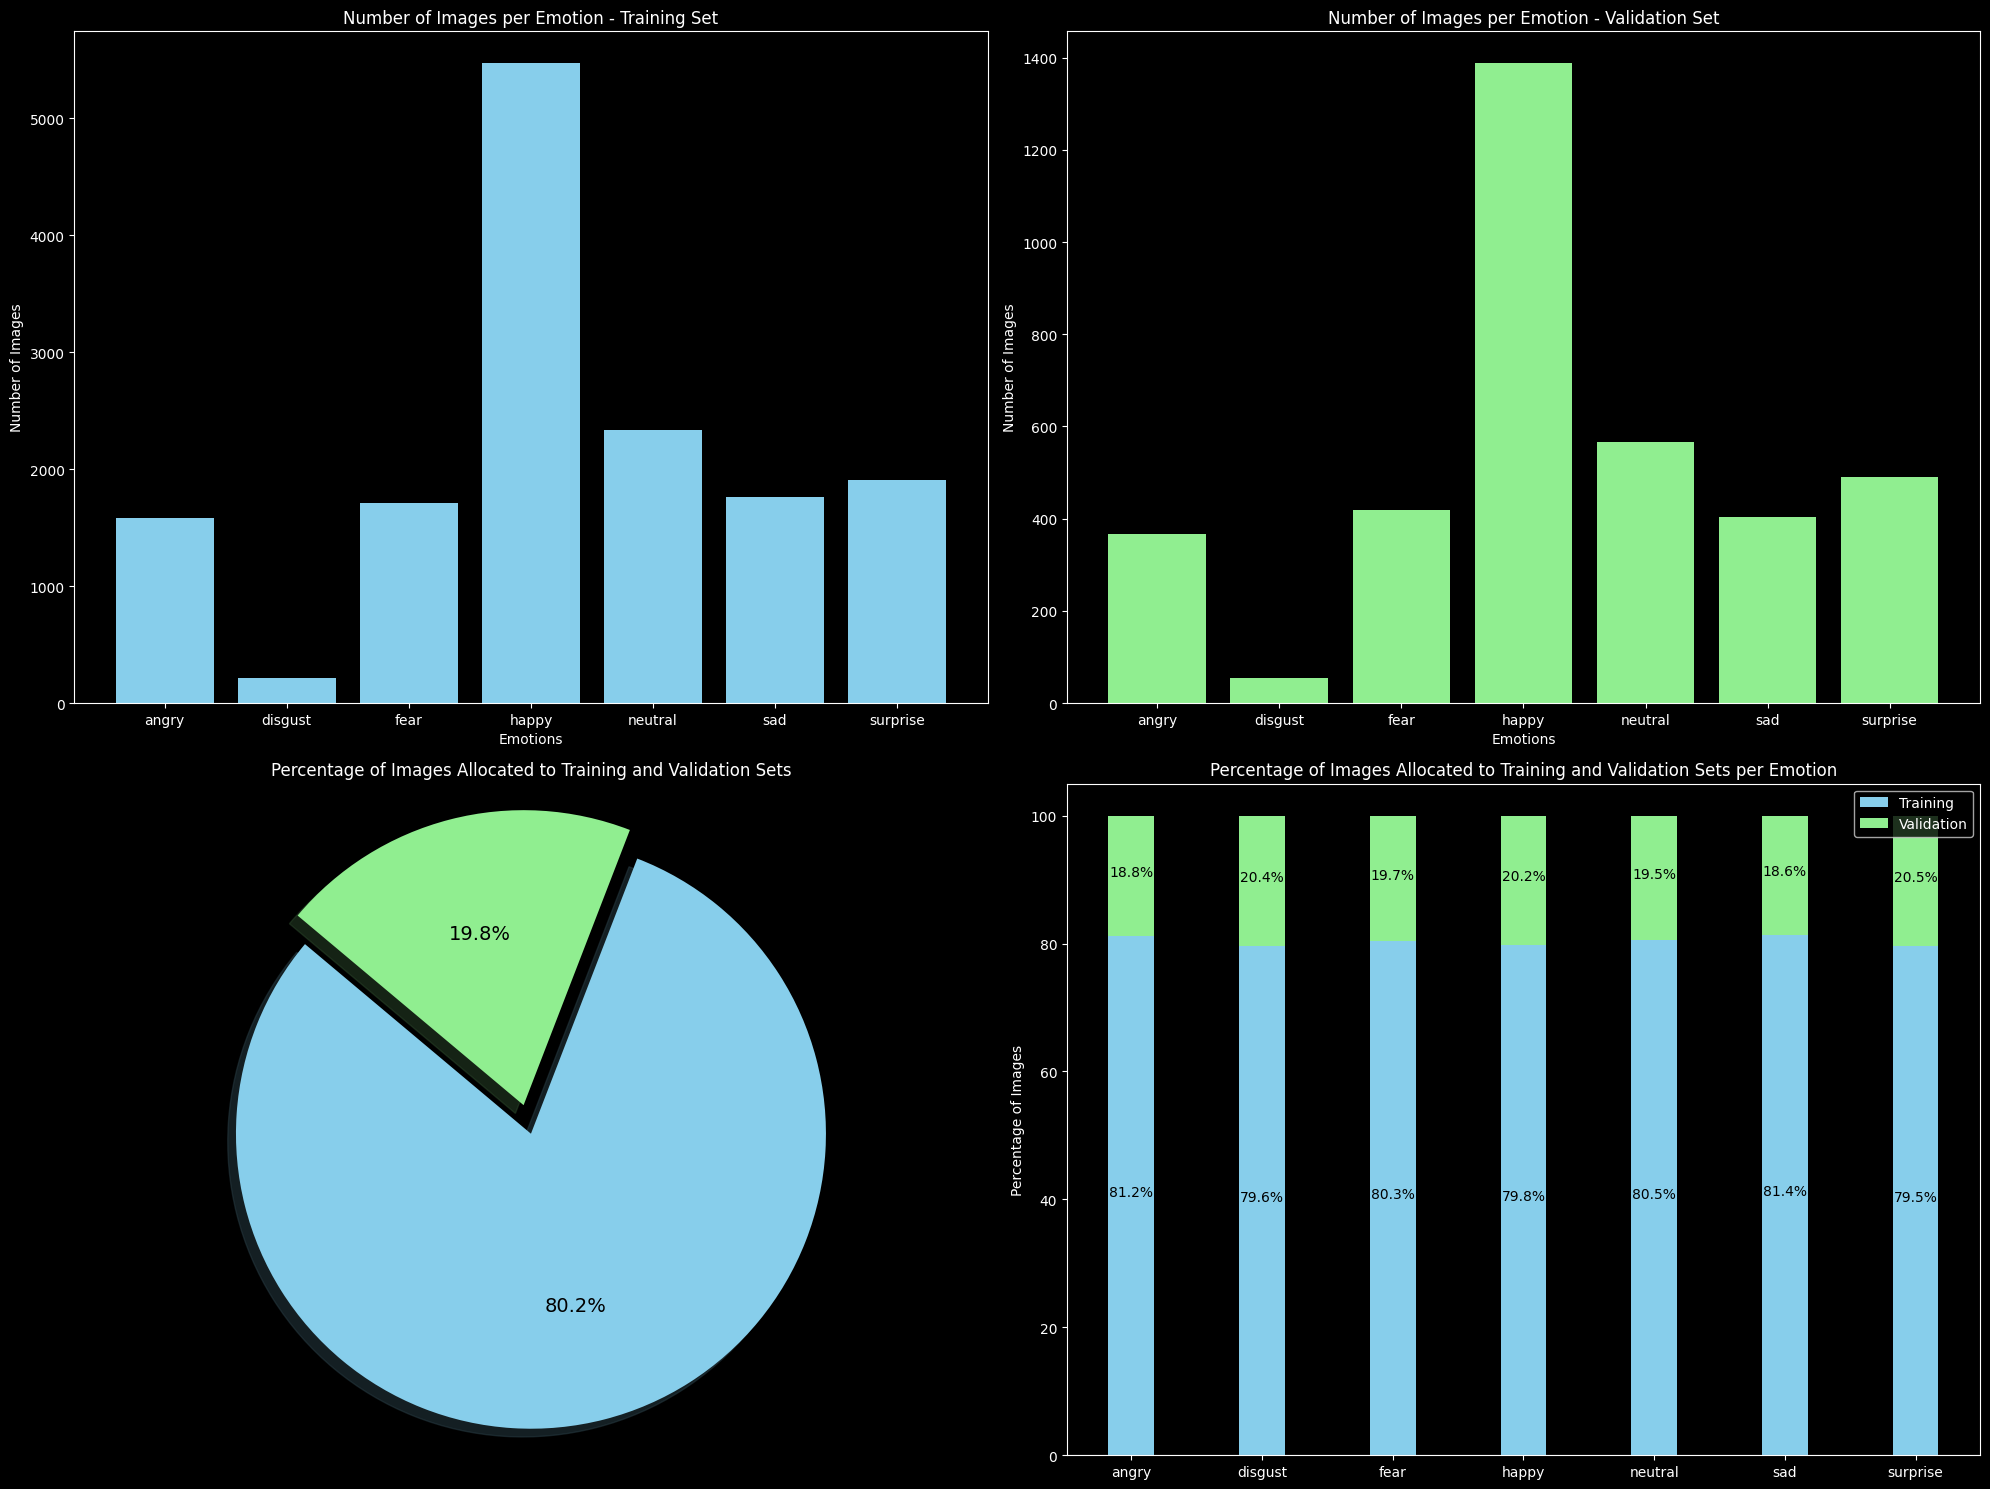

Total number of images in training set: 14976 (80.24%)
Total number of images in validation set: 3687 (19.76%)
Total number of images: 18663


In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Counting number of images in each emotion for train and validation sets

# Train set
train_classes = train_set.class_indices.keys()
train_counts = [0] * len(train_classes)
for _, class_counts in enumerate(train_set.classes):
    train_counts[class_counts] += 1

# Validation set
val_classes = test_set.class_indices.keys()
val_counts = [0] * len(val_classes)
for _, class_counts in enumerate(test_set.classes):
    val_counts[class_counts] += 1

# Total number and percentage of images allocated to train and validation
total_train_images = sum(train_counts)
total_val_images = sum(val_counts)
total_images = total_train_images + total_val_images

train_percentage = (total_train_images / total_images) * 100
val_percentage = (total_val_images / total_images) * 100

# Calculate the total number of images in each class for both train and validation sets
total_counts = np.array(train_counts) + np.array(val_counts)

# Calculate the percentage of images for train and validation sets in each class
train_percentage_per_class = (np.array(train_counts) / total_counts) * 100
val_percentage_per_class = (np.array(val_counts) / total_counts) * 100

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Number of Images per Emotion - Training Set
axes[0, 0].bar(train_classes, train_counts, color='skyblue')
axes[0, 0].set_title('Number of Images per Emotion - Training Set')
axes[0, 0].set_xlabel('Emotions')
axes[0, 0].set_ylabel('Number of Images')

# Number of Images per Emotion - Validation Set
axes[0, 1].bar(val_classes, val_counts, color='lightgreen')
axes[0, 1].set_title('Number of Images per Emotion - Validation Set')
axes[0, 1].set_xlabel('Emotions')
axes[0, 1].set_ylabel('Number of Images')

# Pie chart for the percentage of images allocated to train and validation
labels = ['Training Set', 'Validation Set']
sizes = [train_percentage, val_percentage]
colors = ['skyblue', 'lightgreen']
explode = (0.1, 0)  # explode the 1st slice (Training Set)

# Increase font size and set color to black for the pie chart
font = {'size': 14, 'color': 'black'}
axes[1, 0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
               shadow=True, startangle=140, textprops=font)
axes[1, 0].set_title('Percentage of Images Allocated to Training and Validation Sets')
axes[1, 0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Percentage of Images per Emotion - Training and Validation Sets
ind = np.arange(len(train_classes))  # the x locations for the groups
width = 0.35  # the width of the bars

p1 = axes[1, 1].bar(ind, train_percentage_per_class, width, label='Training', color='skyblue')
p2 = axes[1, 1].bar(ind, val_percentage_per_class, width, bottom=train_percentage_per_class, label='Validation', color='lightgreen')

axes[1, 1].axhline(0, color='grey', linewidth=0.8)
axes[1, 1].set_ylabel('Percentage of Images')
axes[1, 1].set_title('Percentage of Images Allocated to Training and Validation Sets per Emotion')
axes[1, 1].set_xticks(ind)
axes[1, 1].set_xticklabels(train_classes)
axes[1, 1].legend()

# Adding the percentage labels on top of the bars
for i in range(len(train_classes)):
    height = train_percentage_per_class[i]
    axes[1, 1].text(ind[i], height / 2, f'{height:.1f}%', ha='center', color='black')
    axes[1, 1].text(ind[i], height + val_percentage_per_class[i] / 2, f'{val_percentage_per_class[i]:.1f}%', ha='center', color='black')

plt.tight_layout()
plt.show()

print(f'Total number of images in training set: {total_train_images} ({train_percentage:.2f}%)')
print(f'Total number of images in validation set: {total_val_images} ({val_percentage:.2f}%)')
print(f'Total number of images: {total_images}')
